In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys
sys.path.insert(0,"Loading/")
sys.path.insert(0,"Preprocessing/")
sys.path.insert(0,"Modeling/")
sys.path.insert(0,"Evaluation/")
sys.path.insert(0,"Interpretability/")
sys.path.insert(0,"Monitoring/")
sys.path.insert(0,"Utils/")


import loading
import preprocessing
import modeling
import evaluation
import interpretability
import monitoring 
import utils as u

import json 
import pandas as pd
import numpy as np

#Package allowing to reload a package (or a script), without having to reload the whole notebook
#import importlib #no use if the magic commands in the first cell are working

In [33]:
# Here we find the parameters needed for the run. You have to launch this cell only if you do not launch the main script.

path_conf ="../params/conf/conf.json"

# path_conf ='../conf/conf.json'
conf = json.load(open(path_conf, 'r'))

path_log = conf['path_log'] # "../log/my_log_file.txt"
log_level = conf['log_level'] # "DEBUG"

# Be careful to launch the logger only once, otherwise each lines will be duplicated
logger = u.my_get_logger(path_log, log_level, my_name="main_logger")

In [34]:
#Reload of the conf file (useful when you do modifications)
conf = json.load(open(path_conf, 'r'))

## Loading and Preprocessing

In [35]:
conf['selected_dataset']

'marketing_2'

In [36]:
conf["paths"]["Inputs_path"]+ conf["dict_info_files"][conf['selected_dataset']]["path_file"]

'../Inputs/marketing_data_2.csv'

In [46]:
#Reading of the dataset selected in the conf file
df = loading.read_csv_from_name(conf)

In [47]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [39]:
#Preprocessing of the selected dataset
df_preprocessed, X_columns, y_column = preprocessing.main_preprocessing_from_name(df,conf)

#Writting of the preprocessed dataset
loading.write_preprocessed_csv_from_name(df_preprocessed,conf)

'OK'

#### OTHER ? UNDER - OVER SAMPLING

In [40]:
df_preprocessed

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.0,1970.0,84835.0,0.0,0.0,0.0,18900.0,10400.0,37900.0,11100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1961.0,57091.0,0.0,0.0,0.0,46400.0,500.0,6400.0,700.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1958.0,67267.0,0.0,1.0,0.0,13400.0,1100.0,5900.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,1967.0,32474.0,1.0,1.0,0.0,1000.0,0.0,100.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1958.0,71691.0,0.0,0.0,0.0,33600.0,13000.0,41100.0,24000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,2225.0,1966.0,44794.0,0.0,1.0,99.0,5400.0,0.0,700.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,2227.0,1962.0,62568.0,0.0,1.0,99.0,36200.0,1700.0,39800.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1150,2228.0,1969.0,42231.0,1.0,1.0,99.0,2400.0,0.0,800.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1151,2233.0,1900.0,36640.0,1.0,0.0,99.0,1500.0,600.0,800.0,700.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Unnamed: 0'>

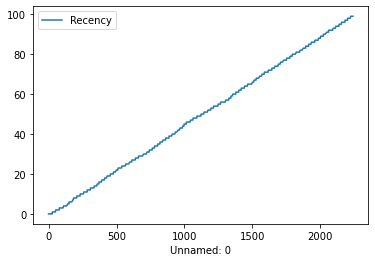

In [50]:
df.plot(x="Unnamed: 0",y="Recency")

In [41]:
#Basic Splitting between train and test
X_train, X_test, y_train, y_test = preprocessing.basic_split( df_preprocessed , 0.25 , X_columns, y_column)

## Modeling

In [42]:
#Modelisation using the model selected in the conf file
clf, best_params = modeling.main_modeling_from_name(X_train,y_train,conf)

#Saving the model
u.save_model(clf, conf)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.5s finished


'OK'

## Evaluation

In [43]:
#Independent step from the other, we reload what we need:

#Loading of the model
clf = u.load_model(conf,name="marketing_random_forest")
#Loading of the preprocessed dataset
df = loading.load_preprocessed_csv_from_name(conf)

#Basic Splitting:
y_column = u.get_y_column_from_conf(conf)
X_columns = [x for x in df.columns if x != y_column ]
X_train, X_test, y_train, y_test = preprocessing.basic_split( df , 0.25 , X_columns, y_column)

../Outputs/Models/marketing_random_forest.sav


In [44]:
#Computing metrics
dict_metrics = evaluation.main_evaluation(clf, X_train, y_train, X_test, y_test, conf)
dict_metrics

ValueError: Number of features of the model must match the input. Model n_features is 46 and input n_features is 45 

## Interpretabily 

## Monitoring

In [ ]:
# Loading what you need ... etc.